In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt # 取代cv2进行显示图片
import pandas as pd
from random import randint

# 加载 & 展示 & 截取图片

In [75]:
# load img as bgr
img = cv2.imread("datasets/VisDrone2019-MOT-train/sequences/uav0000013_00000_v/0000001.jpg", 1)

In [76]:
img.shape

(756, 1344, 3)

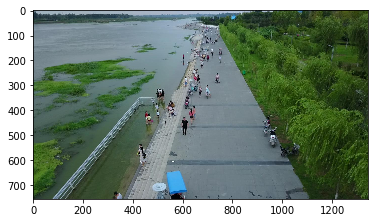

In [77]:
%matplotlib inline

plt.imshow(img[:,:, ::-1]) # transfer to rgb
plt.show()

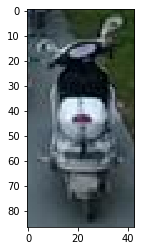

In [80]:
%matplotlib inline

# left, top, width, height, score [0,1]
# 940,466,43,87,1
left = 940
top = 466
width = 43
height = 87
plt.imshow(img[top:top+height, left:left+width, ::-1]) # transfer to rgb
plt.show()

# 通过DataFrame处理VisDrone-MOT标注信息

In [26]:
from tqdm import tqdm

columns=[
    'frame_index',
    'target_id', 
    'bbox_left', 
    'bbox_top', 
    'bbox_width', 
    'bbox_height', 
    'score', 
    'object_category', 
    'truncation', 
    'occlusion', 
    'video']
df = pd.DataFrame(columns=columns)

# files = get_ipython().getoutput('ls datasets/VisDrone2019-MOT-train/annotations')
files = !ls datasets/VisDrone2019-MOT-train/annotations
for file in tqdm(files):
    _df = pd.read_csv('datasets/VisDrone2019-MOT-train/annotations/'+file, names=columns[:-1])
    _df['video'] = [file.split('.')[0]]*len(_df)
    df = pd.concat([df, _df])
df = df.reset_index()

100%|██████████| 56/56 [00:12<00:00,  4.65it/s]


In [27]:
df

,index,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion,video
0,0,1,0,593,43,174,190,0,0,0,0,uav0000013_00000_v
1,1,2,0,592,43,174,189,0,0,0,0,uav0000013_00000_v
2,2,3,0,592,43,174,189,0,0,0,0,uav0000013_00000_v
3,3,4,0,592,43,174,189,0,0,0,0,uav0000013_00000_v
4,4,5,0,592,43,174,189,0,0,0,0,uav0000013_00000_v
...,...,...,...,...,...,...,...,...,...,...,...,...
1169354,25499,292,113,929,362,154,59,1,4,0,1,uav0000366_00001_v
1169355,25500,293,113,928,364,154,58,1,4,0,1,uav0000366_00001_v
1169356,25501,294,113,926,365,156,57,1,4,0,1,uav0000366_00001_v
1169357,25502,295,113,925,367,156,55,1,4,0,1,uav0000366_00001_v


# 基于VisDrone-MOT获取ReID数据集

## pedestrian类别

In [8]:
df_pedestrian = df[(df.score==1) & (df.object_category==1)].reset_index()
df_pedestrian

,index,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion,video
0,464,1,2,424,543,35,88,1,1,0,0,uav0000013_00000_v
1,465,2,2,423,543,35,88,1,1,0,0,uav0000013_00000_v
2,466,3,2,423,543,35,88,1,1,0,0,uav0000013_00000_v
3,467,4,2,423,543,35,88,1,1,0,0,uav0000013_00000_v
4,468,5,2,423,543,35,88,1,1,0,0,uav0000013_00000_v
...,...,...,...,...,...,...,...,...,...,...,...,...
234300,22351,292,102,1440,460,34,77,1,1,0,0,uav0000366_00001_v
234301,22352,293,102,1440,461,34,77,1,1,0,0,uav0000366_00001_v
234302,22353,294,102,1440,462,34,77,1,1,0,0,uav0000366_00001_v
234303,22354,295,102,1440,463,34,77,1,1,0,0,uav0000366_00001_v


### 目标个数

In [9]:
df_pedestrian['target_id'].describe()

count     234305
unique       419
top           40
freq        3541
Name: target_id, dtype: int64

### 目标面积

In [10]:
df_pedestrian_area = df_pedestrian.apply(lambda x: x['bbox_width'] * x['bbox_height'], axis=1)

In [11]:
df_pedestrian_area.describe()

count    234305.000000
mean       1772.774593
std        1587.802108
min          72.000000
25%         714.000000
50%        1275.000000
75%        2360.000000
max       29987.000000
dtype: float64

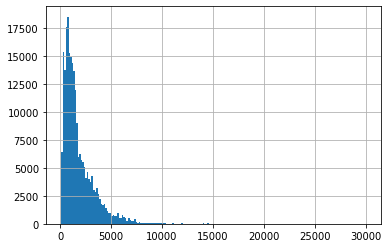

In [12]:
df_pedestrian_area.hist(bins=200)

### 随机展示一张图片

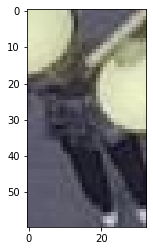

In [81]:
%matplotlib inline

rand_row = randint(0,len(df_pedestrian)-1)
row = df_pedestrian[rand_row:rand_row+1]

data_root = 'datasets/VisDrone2019-MOT-train/sequences/'
file_name = data_root + row['video'].tolist()[0] + '/' + '%07d' % row['frame_index'].tolist()[0] + '.jpg'
img = cv2.imread(file_name, 1)

left = row['bbox_left'].tolist()[0]
top = row['bbox_top'].tolist()[0]
width = row['bbox_width'].tolist()[0]
height = row['bbox_height'].tolist()[0]

plt.imshow(img[top:top+height, left:left+width, ::-1]) # transfer to rgb
plt.show()

## people类别

In [16]:
df_people = df[(df.score==1) & (df.object_category==2)].reset_index()
df_people

,index,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion,video
0,2817,1,14,543,390,36,43,1,2,0,0,uav0000013_00000_v
1,2818,2,14,542,389,36,43,1,2,0,0,uav0000013_00000_v
2,2819,3,14,542,389,36,43,1,2,0,0,uav0000013_00000_v
3,2820,4,14,542,389,36,43,1,2,0,0,uav0000013_00000_v
4,2821,5,14,541,389,36,43,1,2,0,0,uav0000013_00000_v
...,...,...,...,...,...,...,...,...,...,...,...,...
94391,14516,125,61,1790,706,50,76,1,2,0,1,uav0000366_00001_v
94392,14517,126,61,1808,714,50,76,1,2,0,1,uav0000366_00001_v
94393,14518,127,61,1827,722,50,76,1,2,0,1,uav0000366_00001_v
94394,14519,128,61,1846,730,50,76,1,2,0,1,uav0000366_00001_v


In [17]:
df_people.describe()

,index
count,94396.000000
mean,17305.246949
std,14778.329489
min,0.000000
25%,5603.000000
50%,13422.000000
75%,23744.000000
max,66725.000000


### 目标个数

In [18]:
df_people['target_id'].describe()

count     94396
unique      295
top          53
freq       2006
Name: target_id, dtype: int64

### 目标面积

In [19]:
df_people_area = df_people.apply(lambda x: x['bbox_width'] * x['bbox_height'], axis=1)
df_people_area.describe()

count    94396.000000
mean      1631.528741
std       1331.982811
min         77.000000
25%        738.000000
50%       1296.000000
75%       2162.000000
max      16020.000000
dtype: float64

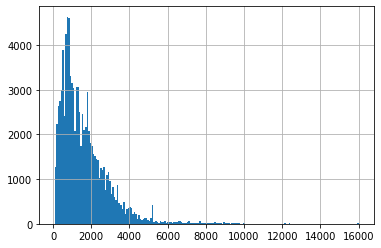

In [20]:
df_people_area.hist(bins=200)

### 随机选取一张照片

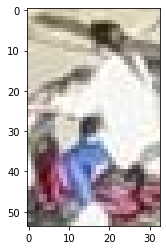

In [115]:
%matplotlib inline

rand_row = randint(0,len(df_people)-1)
row = df_people[rand_row:rand_row+1]

data_root = 'datasets/VisDrone2019-MOT-train/sequences/'
file_name = data_root + row['video'].tolist()[0] + '/' + '%07d' % (row['frame_index'].tolist()[0]) + '.jpg'
img = cv2.imread(file_name, 1)

left = row['bbox_left'].tolist()[0]
top = row['bbox_top'].tolist()[0]
width = row['bbox_width'].tolist()[0]
height = row['bbox_height'].tolist()[0]

plt.imshow(img[top:top+height, left:left+width, ::-1]) # transfer to rgb
plt.show()

# 基于VisDrone-MOT获取COCO数据集

# 图片合成视频

In [ ]:
!ffmpeg -loop 0 \
    -i datasets/VisDrone2019-MOT-train/sequences/uav0000013_00000_v/%07d.jpg \
    -r 10 \
    datasets/VisDrone2019-MOT-train/test.mp4

# test

In [1]:
import json

In [24]:
ann = json.load(open('data/VisDrone_MOT_tiny/train/cocoformat.json', 'r'))

In [25]:
set([item['category_id'] for item in ann['annotations']])

{1, 2}

In [26]:
ann['categories']

[{'id': 1, 'name': 'pedestrian'}, {'id': 2, 'name': 'people'}]

In [28]:
ann_test = json.load(open('data/VisDrone_MOT_tiny/test/cocoformat.json', 'r'))

In [29]:
set([item['category_id'] for item in ann_test['annotations']])

{1, 2}